## Visual story telling part 1: green buildings

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib as plt
import seaborn as sns

In [3]:
df = pd.read_csv('greenbuildings.csv')
df

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


We are recreating the analysis from the top to do some more hypothesis testing for later

In [4]:
mask = (df['leasing_rate'] >= 0.1)
filtered_data = df[mask]
filtered_data

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
0,379105,1,260300,2.22,38.56,91.39,14,16,0,1,...,1,0,1,4988,58,5046,42.57,0.013700,0.029000,36.78
1,122151,1,67861,2.22,28.57,87.14,5,27,0,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
2,379839,1,164848,2.22,33.31,88.94,13,36,1,0,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
3,94614,1,93372,2.22,35.00,97.04,13,46,1,0,...,0,0,0,4988,58,5046,42.57,0.013731,0.029045,36.78
4,379285,1,174307,2.22,40.69,96.58,16,5,0,1,...,0,0,1,4988,58,5046,42.57,0.013731,0.029045,36.78
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7889,157117,1230,1300000,1.15,137.51,100.00,41,35,0,1,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7890,158379,1230,16140,1.15,152.73,75.22,8,90,1,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7891,52316,1230,15726,1.15,158.92,100.00,6,67,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72
7892,158124,1230,51300,1.15,198.99,100.00,12,91,0,0,...,0,0,0,1299,4796,6095,48.35,0.011757,0.045457,58.72


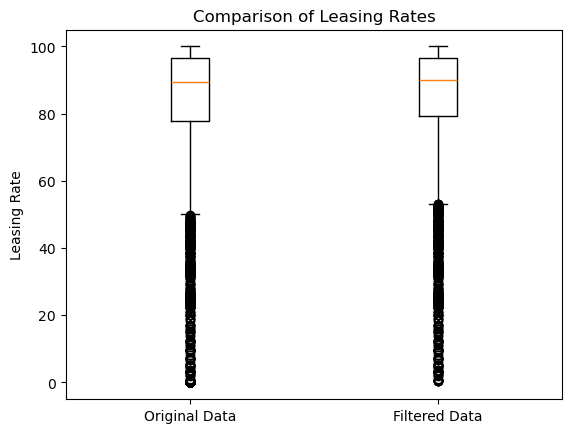

In [5]:
import matplotlib.pyplot as plt

# Create a figure and axis
fig, ax = plt.subplots()

# Plot the box plot for df['leasing_rate']
ax.boxplot([df['leasing_rate'], filtered_data['leasing_rate']], labels=['Original Data', 'Filtered Data'])

# Set the labels
ax.set_title('Comparison of Leasing Rates')
ax.set_ylabel('Leasing Rate')

# Display the plot
plt.show()

Why did she use 10% as the cutoff?

as we can see from the graph that 10% cutoff doesnt have much of the effect on the data and therefore she chould have removed aleast 55% or so because of many outliers.

But for now we re just following the steps

In [6]:
green_buildings = filtered_data[filtered_data['green_rating'] == 1]
non_green_buildings = filtered_data[filtered_data['green_rating'] == 0]


med_green = np.median(green_buildings['Rent'])
med_non_green = np.median(non_green_buildings['Rent'])
print("Median Rent for Green Buildings:", med_green)
print("Median Rent for Non-Green Buildings:", med_non_green)

Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.0


In [7]:
print("Median Rent for Green Buildings:", med_green)
print("Median Rent for Non-Green Buildings:", med_non_green)
print("Standard Deviation of Rent for Green Buildings:", np.std(green_buildings['Rent']))
print("Standard Deviation of Rent for Non-Green Buildings:", np.std(non_green_buildings['Rent']))
print("Number of Green Buildings:", len(green_buildings['Rent']))
print("Number of Non-Green Buildings:", len(non_green_buildings['Rent']))

Median Rent for Green Buildings: 27.6
Median Rent for Non-Green Buildings: 25.0
Standard Deviation of Rent for Green Buildings: 12.945978129711223
Standard Deviation of Rent for Non-Green Buildings: 15.292533205254454
Number of Green Buildings: 684
Number of Non-Green Buildings: 7050


In [8]:
std_green = np.std(green_buildings['Rent'])
std_nongreen = np.std(non_green_buildings['Rent'])
n_green = len(green_buildings['Rent'])
n_nongreen = len(non_green_buildings['Rent'])
z1 = 1.96 # using 95% confidence level
z2 = 3.29 # using 99.9% confidence level
def confidence_intervals(med, z, s, n):
    upper_level = med + z * (s/np.sqrt(n))
    lower_level = med - z * (s/np.sqrt(n))
    ci_vals = [lower_level, upper_level]
    return ci_vals
ci_green = confidence_intervals(med_green, z2, std_green, n_green)
ci_nongreen = confidence_intervals(med_non_green, z2, std_nongreen, n_nongreen)
print("CI Green Buildings: " + str(ci_green))
print("CI Non Green Buildings: " + str(ci_nongreen))

CI Green Buildings: [25.971443928140534, 29.22855607185947]
CI Non Green Buildings: [24.400787628113225, 25.599212371886775]


We may not compare "raw" median values for rent of green and non-green buildings due to a different sample size (685 vs 7209). We need to construct confidence intervals for both of them.

In [15]:
worst_case = ci_green[0] - ci_nongreen[1]
best_case = ci_green[1] - ci_nongreen[0]
print(f"In the worst-case scenario, we are 99.9 percent sure that green buildings will make at least ${worst_case:,.2f} more money per square foot.")
print(f"In the best-case scenario, we are 99.9 percent sure that green buildings will make at least ${worst_case:,.2f} more money per square foot.")

In the worst-case scenario, we are 99.9 percent sure that green buildings will make at least $0.37 more money per square foot.
In the best-case scenario, we are 99.9 percent sure that green buildings will make at least $0.37 more money per square foot.


In [17]:
worst_profit = 250000 * worst_case
best_profit = 250000 * best_case
print(f"In the worst-case scenario, we are 99.9 percent sure that given green project will make at least ${worst_profit:,.2f} more money than non-green buildings.")
print(f"In the best-case scenario, we are 99.9 percent sure that given green project will make at least ${best_profit:,.2f} more money than non-green buildings.")

In the worst-case scenario, we are 99.9 percent sure that given green project will make at least $93,057.89 more money than non-green buildings.
In the best-case scenario, we are 99.9 percent sure that given green project will make at least $1,206,942.11 more money than non-green buildings.


In [21]:
worst_payback = 5000000/worst_profit
best_payback = 5000000/best_profit
print(f"In the worst-case scenario, we are 99.9 percent sure that the payback period will be {worst_payback:,.2f}  years")
print(f"In the best-case scenario, we are 99.9 percent sure that the payback period will be {best_payback:,.2f} years.")

In the worst-case scenario, we are 99.9 percent sure that the payback period will be 53.73  years
In the best-case scenario, we are 99.9 percent sure that the payback period will be 4.14 years.


In [13]:
df['Rent'].describe()

count    7894.000000
mean       28.418569
std        15.075483
min         2.980000
25%        19.500000
50%        25.160000
75%        34.180000
max       250.000000
Name: Rent, dtype: float64

In [14]:
green_buildings.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,6.840000e+02,684.000000,6.840000e+02,678.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,...,684.0,684.000000,684.00000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000,684.000000
mean,3.976887e+05,623.429825,3.259652e+05,3.506032,30.028480,89.412427,15.346491,23.880117,0.213450,0.798246,...,1.0,0.057018,0.72807,1423.070175,2794.815789,4217.885965,29.199474,0.011096,0.031586,26.902251
std,4.834225e+05,393.035988,2.899452e+05,9.581587,12.955452,11.824252,13.284194,15.555134,0.410043,0.401603,...,0.0,0.232046,0.44528,1218.554173,1887.540907,1951.875882,10.979057,0.001917,0.007820,9.725482
min,2.883000e+03,1.000000,1.056000e+04,-24.950000,8.870000,12.390000,1.000000,0.000000,0.000000,0.000000,...,1.0,0.000000,0.00000,130.000000,0.000000,2103.000000,10.460000,0.009500,0.017800,9.000000
25%,2.467628e+05,294.750000,1.200000e+05,1.770000,21.497500,85.452500,5.000000,18.000000,0.000000,1.000000,...,1.0,0.000000,0.00000,684.000000,1419.000000,2103.000000,22.710000,0.010300,0.023500,19.800000
50%,2.803790e+05,489.500000,2.411990e+05,2.380000,27.600000,92.925000,11.000000,22.000000,0.000000,1.000000,...,1.0,0.000000,1.00000,906.500000,1670.000000,4416.000000,22.710000,0.010300,0.034100,25.375000
75%,4.097112e+05,1047.250000,4.174492e+05,2.962500,35.540000,97.702500,21.000000,26.000000,0.000000,1.000000,...,1.0,0.000000,1.00000,1813.000000,4347.000000,5720.000000,40.700000,0.011800,0.037800,32.306250
max,6.174162e+06,1230.000000,1.721242e+06,67.780000,138.070000,100.000000,76.000000,116.000000,1.000000,1.000000,...,1.0,1.000000,1.00000,5240.000000,7200.000000,8244.000000,58.020000,0.028900,0.062800,71.440000


In [15]:
non_green_buildings.describe()

,CS_PropertyID,cluster,size,empl_gr,Rent,leasing_rate,stories,age,renovated,class_a,...,green_rating,net,amenities,cd_total_07,hd_total07,total_dd_07,Precipitation,Gas_Costs,Electricity_Costs,cluster_rent
count,7.050000e+03,7050.000000,7.050000e+03,6983.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,...,7050.0,7050.000000,7050.000000,7050.000000,7050.000000,7050.000000,7050.00000,7050.000000,7050.000000,7050.000000
mean,4.392828e+05,586.109787,2.299326e+05,3.153566,28.414156,83.820782,13.626241,49.352908,0.398156,0.368936,...,0.0,0.033191,0.517163,1200.260709,3501.646809,4701.907518,31.26495,0.011348,0.030880,27.630683
std,7.034967e+05,400.780380,2.987801e+05,7.982120,15.293618,18.369717,12.221000,32.493399,0.489553,0.482551,...,0.0,0.179149,0.499741,1084.809107,1973.018750,1985.729272,11.63340,0.002402,0.008581,10.673726
min,1.000000e+00,1.000000,2.378000e+03,-24.950000,2.980000,0.310000,1.000000,0.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,39.000000,0.000000,2103.000000,10.46000,0.009487,0.017819,9.000000
25%,1.570862e+05,269.000000,4.879100e+04,1.740000,19.430000,78.310000,4.000000,24.000000,0.000000,0.000000,...,0.0,0.000000,0.000000,684.000000,1419.000000,2869.000000,22.71000,0.010296,0.023300,20.325000
50%,3.132700e+05,476.500000,1.225860e+05,1.970000,25.000000,89.465000,10.000000,36.000000,0.000000,0.000000,...,0.0,0.000000,1.000000,966.000000,2739.000000,4979.000000,23.16000,0.010296,0.032737,25.145000
75%,4.411330e+05,1044.000000,2.830000e+05,2.380000,34.180000,96.430000,19.000000,80.000000,1.000000,1.000000,...,0.0,0.000000,1.000000,1534.000000,5042.000000,6558.000000,43.89000,0.011816,0.037808,34.180000
max,6.208103e+06,1230.000000,3.781045e+06,67.780000,250.000000,100.000000,110.000000,187.000000,1.000000,1.000000,...,0.0,1.000000,1.000000,5240.000000,7200.000000,8244.000000,58.02000,0.028914,0.062778,71.440000


We can see that there is no much correlation btw size and Rent

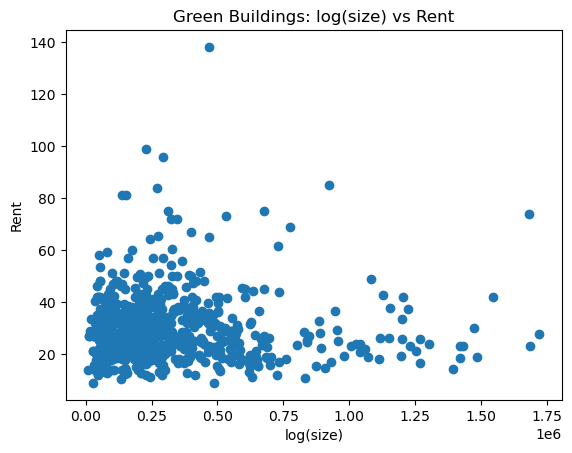

In [22]:
df_rentgreen = green_buildings[['size', 'Rent']]
x = np.log(df_rentgreen['size'])
y = df_rentgreen['Rent']
plt.scatter(x,y)
plt.xlabel('log(size)') 
plt.ylabel('Rent') 
plt.title('Green Buildings: log(size) vs Rent') 
plt.show()

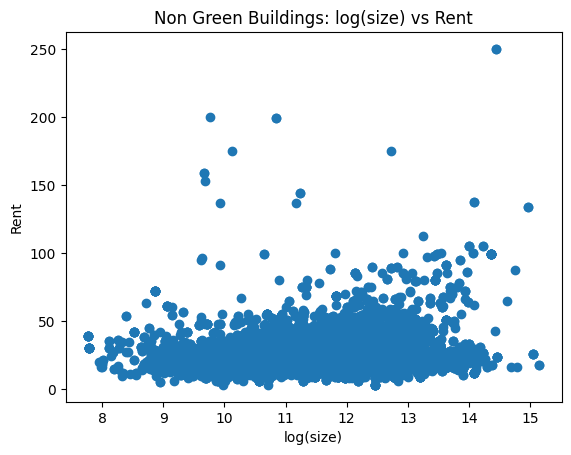

In [17]:
df_nongreen = non_green_buildings[['size', 'Rent']]
x = np.log(df_nongreen['size'])
y = df_nongreen['Rent']
plt.scatter(x,y)
plt.xlabel('log(size)') 
plt.ylabel('Rent') 
plt.title('Non Green Buildings: log(size) vs Rent') 
plt.show()

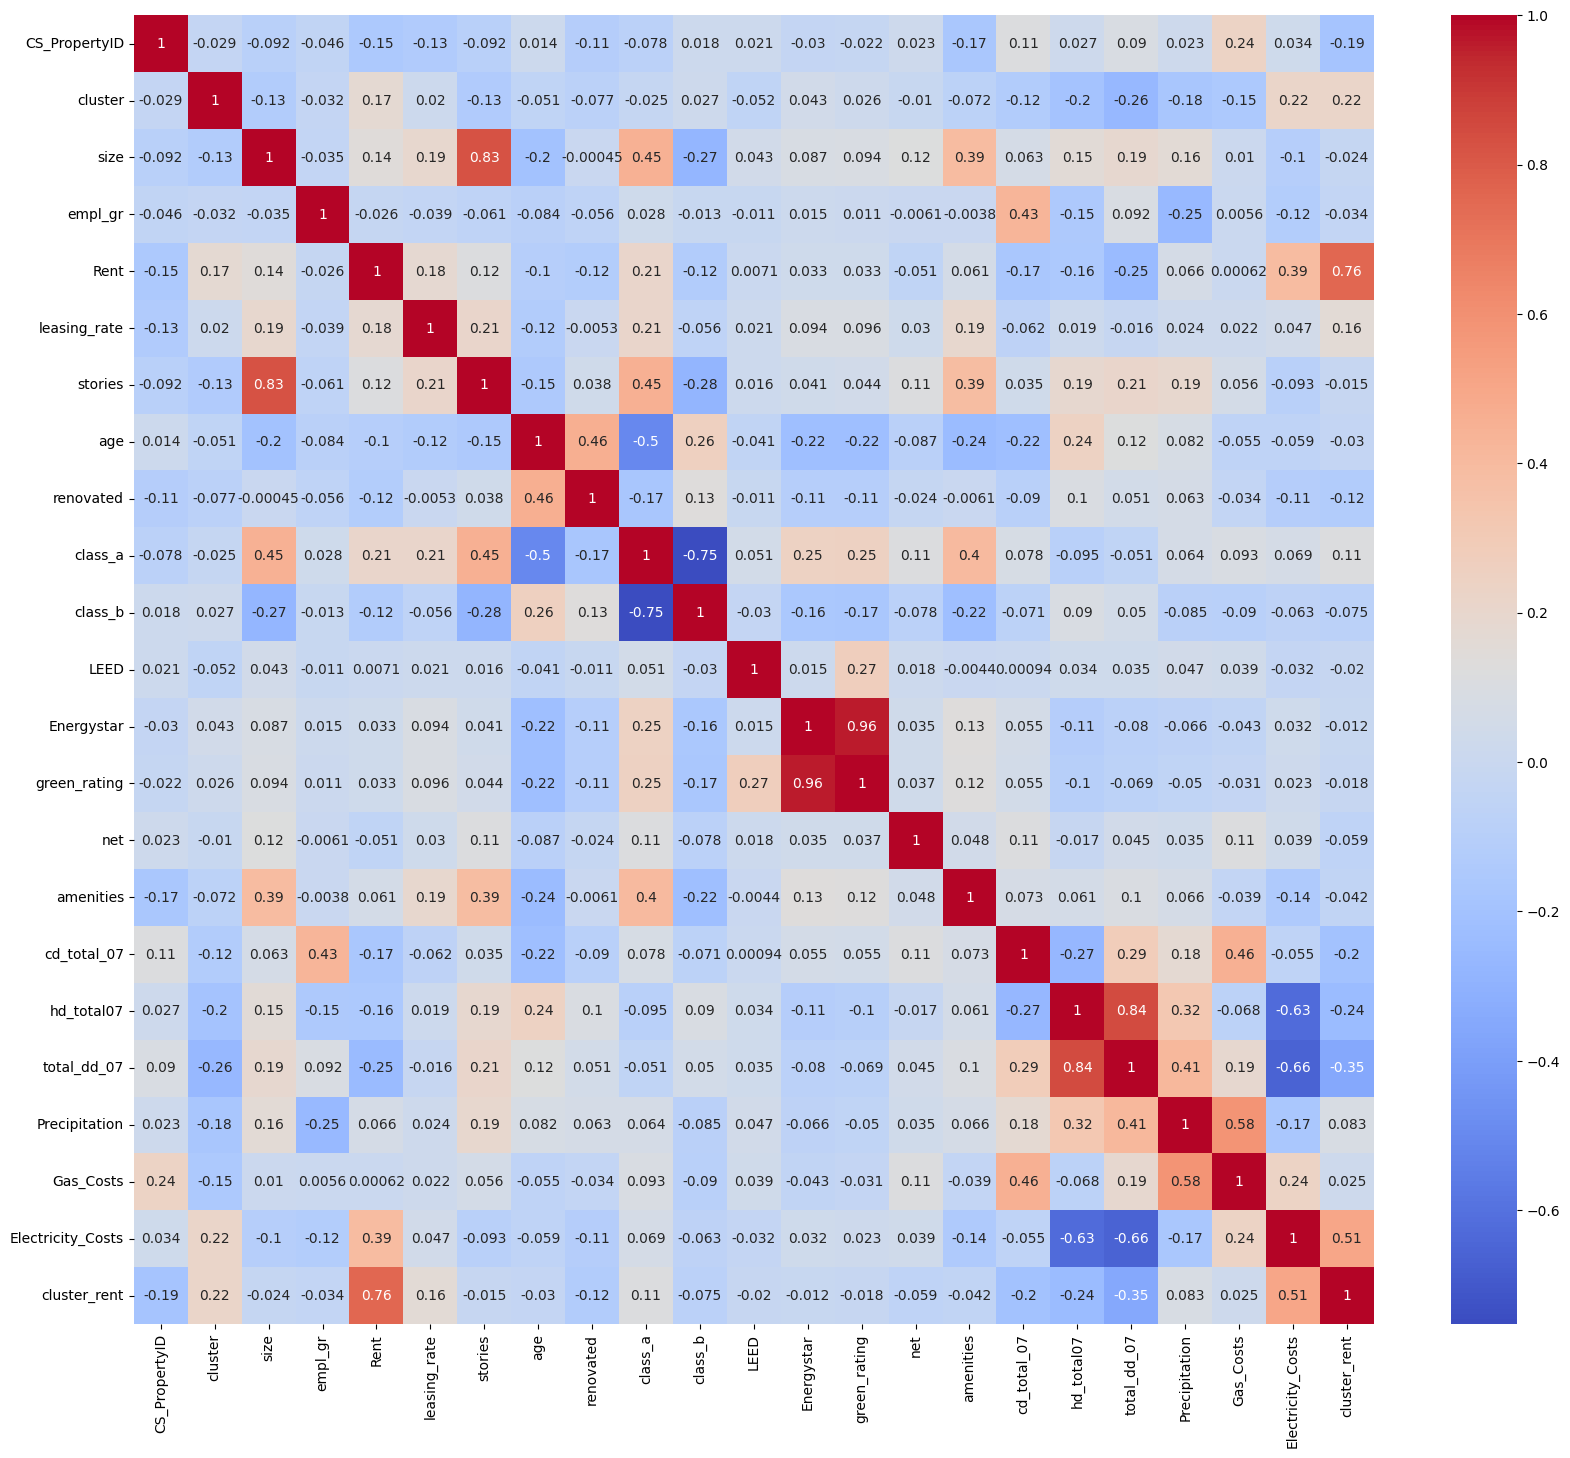

In [18]:
plt.figure(figsize=(20, 17))
green_corr = df.corr()
heat_map = sns.heatmap(green_corr, cmap="coolwarm", annot=True, )
plt.show()

### No, we did not find a confounding variable for rent and green status. We however, did see that at the highest confidence level, green rent was higher than non green rent, which indicates that green status has some effect on rent price.